# Part II - FIVE TAKEAWAYS FROM PISA 2012 ANALYSIS
## by (Anas Azzioui)

## Investigation Overview

In this investigation, I want to take a closer look at what features help students score better at math. 
 - What are the learning strategies used by the highest scorers?
 - What are their work ethics?
 - Are there any behaviors that favorites them?
 
 and more answers to find as we go on. I intend to retrieve 5 insights from students who scored an average math score of 600 or higher, which should help any student become better at math.

## Dataset Overview

PISA is a Program for International Student Assessment that assesses 15 years old students' competencies in 3 main subjects: mathematics, science and reading. It is conducted every 3 years, and each time the focus is on one of the subjects. In 2012, the focus was on mathematics, which means, students got more questions math-related. Alongside the assessments, PISA gather a lot of information about many features related especially to students, parents, teachers and schools.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
pisa_df= pd.read_csv('../pisa2012_to_explane.csv', encoding="cp1252", sep=',', index_col=0);

In [6]:
#print(pisa_df.head())
print(pisa_df.shape)
print(pisa_df.info())

(485490, 96)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 96 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Country_code                                        485490 non-null  object 
 1   OECD_1_0                                            485490 non-null  object 
 2   NC                                                  485490 non-null  object 
 3   International_grade                                 485490 non-null  int64  
 4   Birth_Month                                         485490 non-null  int64  
 5   Birth_Year                                          485490 non-null  int64  
 6   Gender                                              485490 non-null  object 
 7   Late_for_school                                     485490 non-null  object 
 8   Skip_whole_school_day                              

## Correlation between math, science and reading average scores:

Mean scores of math,reading and science are strongly, positively correlated with one another. This means that a student who is good at math is usually also good at reading and science. Later, in this presentation, we will focus only on one of disciplines which is mathematics.

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

<Figure size 432x288 with 0 Axes>

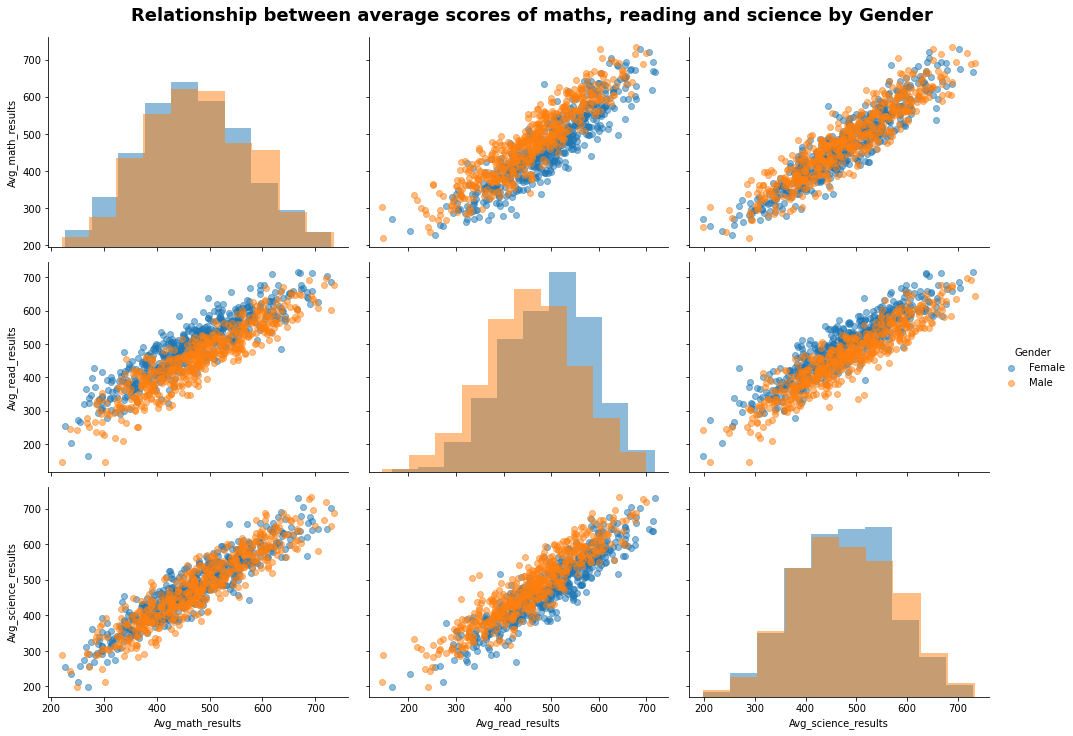

In [17]:
# Relationships between math, science and reading mean scores by gender

# Sample 1000 students so that plots are clearer and they render faster
sample = np.random.choice(pisa_df.shape[0], 1000, replace = False);
pisa_df_sample = pisa_df.loc[sample,:];

# plot:
plt.tight_layout();
ax = sb.PairGrid(data=pisa_df_sample, vars = ['Avg_math_results', 'Avg_read_results', 'Avg_science_results'], hue='Gender', height = 10/3, aspect = (14/3)/(10/3));
ax.map_diag(plt.hist, alpha=0.5);
ax.map_offdiag(plt.scatter, alpha=0.5);
ax.fig.suptitle('Relationship between average scores of maths, reading and science by Gender', fontsize=18, weight='bold', y = 1.02);
ax.add_legend();


## Distribution of math scores for all countries:

The following plot shows that the math's average score among students of all countries is normally distributed, with the highest number of students having an average score above 400 and less than 500. 

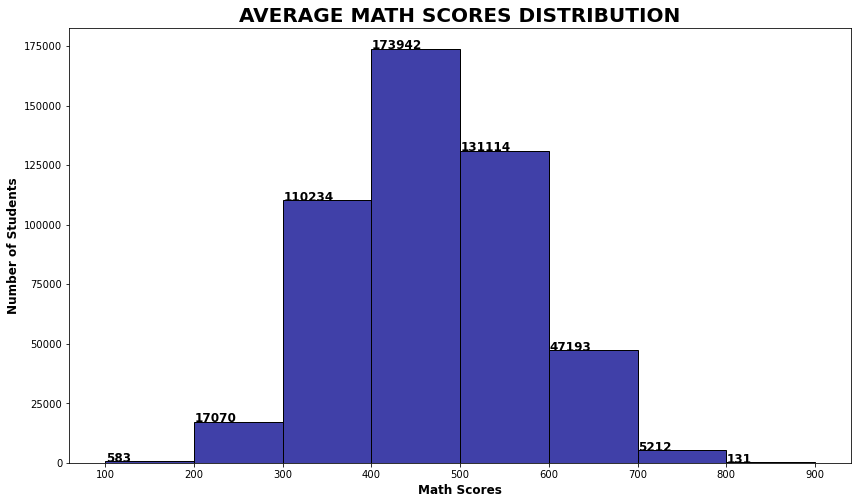

In [85]:
bins= np.arange(100, pisa_df.Avg_math_results.max()+1,100 )
plt.figure(figsize=[14, 8])
ax=sb.histplot(pisa_df['Avg_math_results'], bins=bins, color='darkblue');
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.8, p.get_height()), weight='bold',size=12)
plt.title('AVERAGE MATH SCORES DISTRIBUTION', fontsize=20, weight='bold')
plt.xlabel('Math Scores', fontsize=12, weight='bold')
plt.ylabel('Number of Students',fontsize=12, weight='bold');

## STUDENTS' GRADES DISTRIBUTION:

PISA assesses students that are 15 years old whatever grade they are in. So it's worth taking into consideration that some student studied more math concepts than others. Let's see the grades distribution of students:



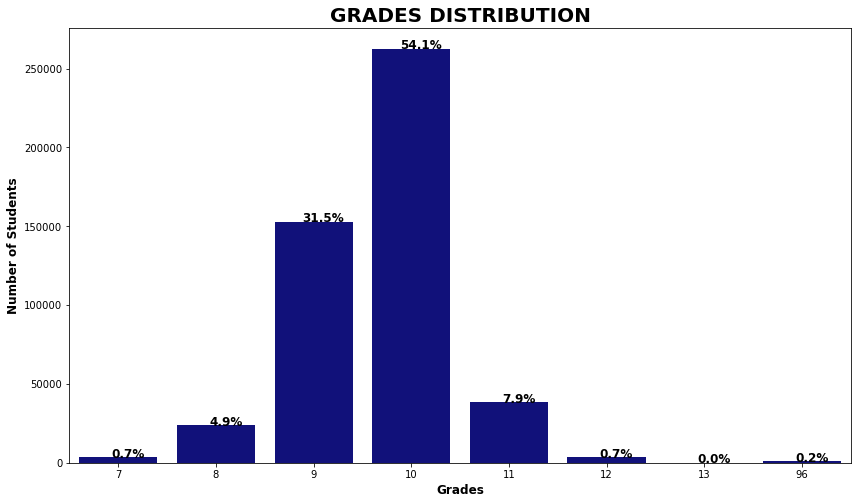

In [58]:
plt.figure(figsize=[14, 8])

ax=sb.countplot(data=pisa_df, x='International_grade', color='darkblue');

total = pisa_df['International_grade'].value_counts().sum()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()-0.3
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', fontsize=12, weight='bold')

plt.title('GRADES DISTRIBUTION', fontsize=20, weight='bold')
plt.xlabel('Grades', fontsize=12, weight='bold')
plt.ylabel('Number of Students', fontsize=12, weight='bold');
plt.show();

## ABSENTEEISM VS SCORES:
In Truancy, we try to analyse 3 aspects from student's perspective:

    - How often being late to school
    - How often skipping classes within school day
    - How often skipping the whole school day

When we analyse the visualization, it is clear that the median of scores of students who are never late, never skip classes or school days is significantly higher than the others. Also, we notice, the more often the students are late, skip classes or skip school days the worst their scores are.

#### 1. Being late to school

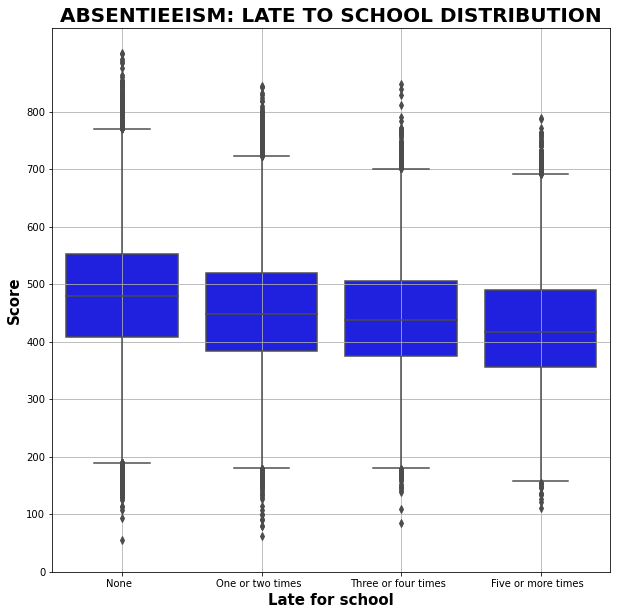

In [110]:
score_ticks=[0,100,200,300,400,500,600,700,800]
fig, ax = plt.subplots(figsize = [10,10])

order_late= pisa_df['Late_for_school'].value_counts().index


sb.boxplot(data=pisa_df, x='Late_for_school', y='Avg_math_results', color='blue', order=order_late, ax = ax).axes.set_title("ABSENTIEEISM: LATE TO SCHOOL DISTRIBUTION",fontsize=20, weight='bold')

ax.grid()
ax.set_yticks(score_ticks)
ax.set_xlabel("Late for school", fontsize=15, weight='bold')
ax.set_ylabel("Score",fontsize=15, weight='bold' )


plt.show()

In [ ]:
## ABSENTEEISM VS SCORES:
#### Skipping classes within school day

A second aspect of absenteeism:

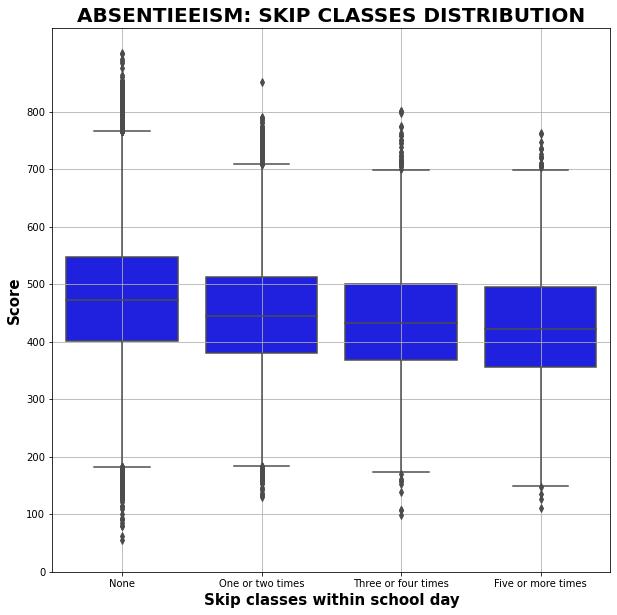

In [108]:
fig, ax = plt.subplots(figsize = [10,10])

order_skip_class= pisa_df['Skip_classes_within_school_day'].value_counts().index

sb.boxplot(data=pisa_df, x='Skip_classes_within_school_day', y='Avg_math_results', color='blue', order=order_skip_class, ax = ax).axes.set_title("ABSENTIEEISM: SKIP CLASSES DISTRIBUTION",fontsize=20, weight='bold');

ax.grid()
ax.set_yticks(score_ticks)
ax.set_xlabel("Skip classes within school day", fontsize=15, weight='bold')
ax.set_ylabel("Score",fontsize=15, weight='bold' )


plt.show()

#### Skipping the whole school day

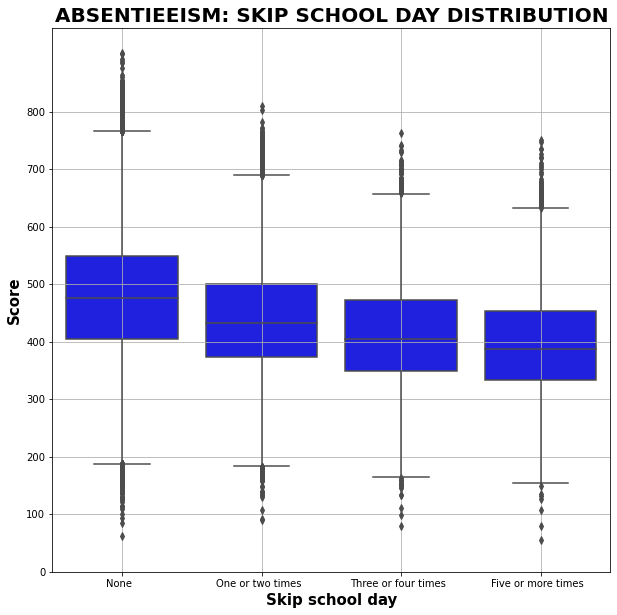

In [109]:
fig, ax = plt.subplots(figsize = [10,10])

order_skip_day= pisa_df['Skip_whole_school_day'].value_counts().index

sb.boxplot(data=pisa_df, x='Skip_whole_school_day', y='Avg_math_results', color='blue', order=order_skip_day, ax = ax).axes.set_title("ABSENTIEEISM: SKIP SCHOOL DAY DISTRIBUTION",fontsize=20, weight='bold');

ax.grid()
ax.set_yticks(score_ticks)
ax.set_xlabel("Skip school day", fontsize=15, weight='bold')
ax.set_ylabel("Score",fontsize=15, weight='bold' )


plt.show()

## BEING INTERESTED IN MATH VS SCORES:

The number of students who strongly agree being interested in MATH in general, Math lessons in particular, reading or generally enjoying math is, ironically at the same time, higher among those scoring above 600 more than in the other categories and also slightly higher among those scoring less than 300 compared to other categories.

Also, we notice that statistically, we can't claim there is any obvious correlation between being interested in math and having good or bad scores in it.

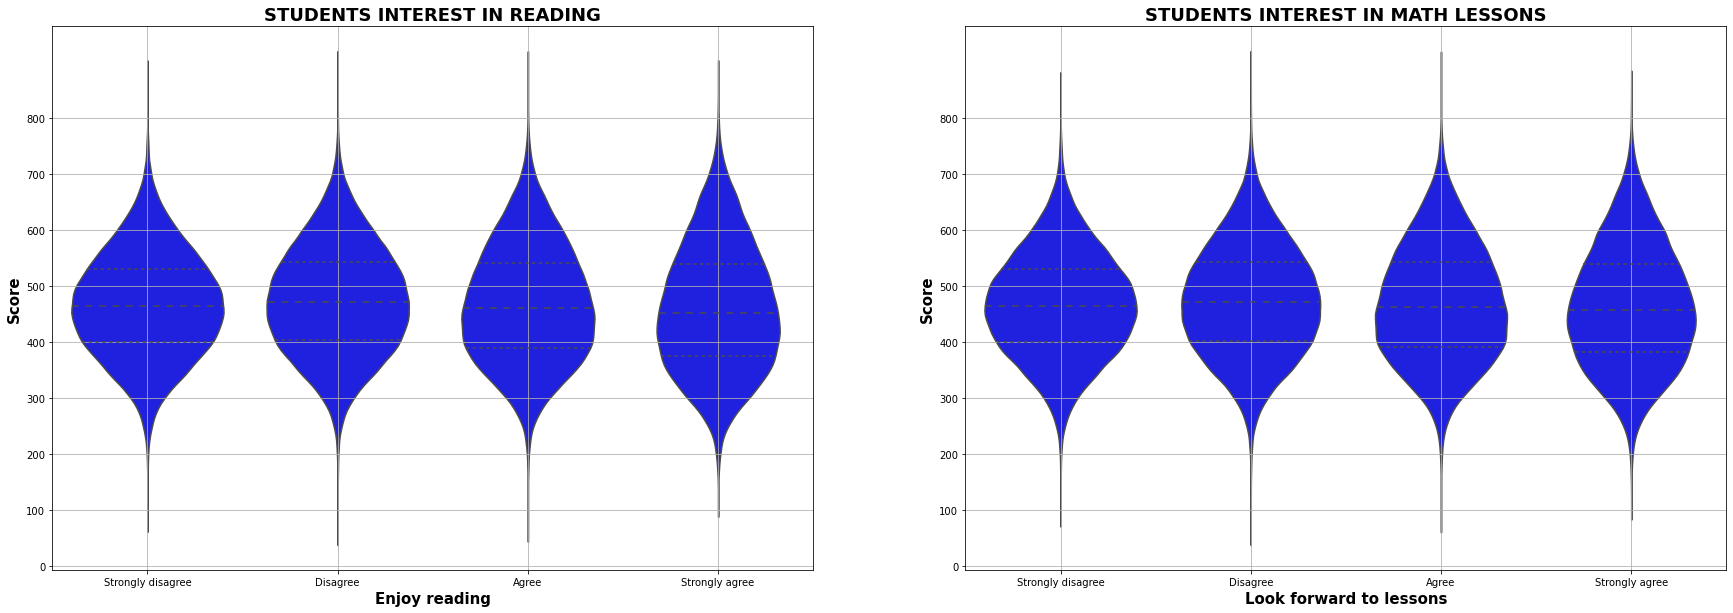

In [125]:
# Let's plot the score of students according to their math interest features:
fig, ax = plt.subplots(ncols=2, figsize = [30,10])

order=['Strongly disagree','Disagree','Agree','Strongly agree']

sb.violinplot(data=pisa_df, x='Enjoy_Reading', y='Avg_math_results', color='blue', inner='quartile', order=order, ax = ax[0]).axes.set_title("STUDENTS INTEREST IN READING",fontsize=18, weight='bold')
sb.violinplot(data=pisa_df, x='Look_Forward_to_Lessons', y='Avg_math_results', color='blue', inner='quartile', order=order, ax = ax[1]).axes.set_title("STUDENTS INTEREST IN MATH LESSONS",fontsize=18, weight='bold');

ax[0].grid()
ax[0].set_yticks(score_ticks)
ax[0].set_xlabel("Enjoy reading", fontsize=15, weight='bold')
ax[0].set_ylabel("Score",fontsize=15, weight='bold' )
ax[1].grid()
ax[1].set_yticks(score_ticks)
ax[1].set_xlabel("Look forward to lessons", fontsize=15, weight='bold')
ax[1].set_ylabel("Score",fontsize=15, weight='bold' )


plt.show()

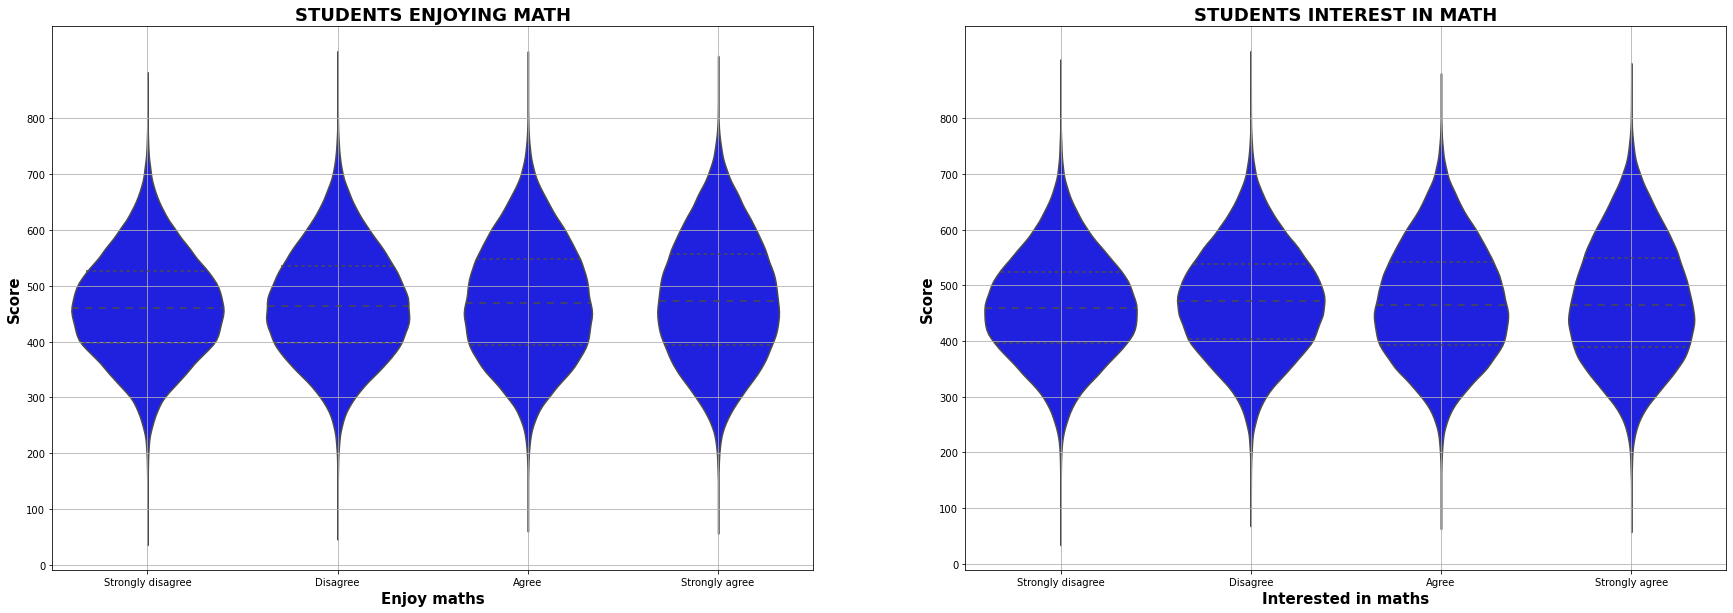

In [126]:
# Let's plot the score of students according to their math interest features:
fig, ax = plt.subplots(ncols=2, figsize = [30,10])

order=['Strongly disagree','Disagree','Agree','Strongly agree']

sb.violinplot(data=pisa_df, x='Enjoy_Maths', y='Avg_math_results', color='blue', inner='quartile', order=order, ax = ax[0]).axes.set_title("STUDENTS ENJOYING MATH",fontsize=18, weight='bold');
sb.violinplot(data=pisa_df, x='Interested_in_math', y='Avg_math_results', color='blue', inner='quartile', order=order, ax = ax[1]).axes.set_title("STUDENTS INTEREST IN MATH",fontsize=18, weight='bold');

ax[0].grid()
ax[0].set_yticks(score_ticks)
ax[0].set_xlabel("Enjoy maths", fontsize=15, weight='bold')
ax[0].set_ylabel("Score",fontsize=15, weight='bold' )
ax[1].grid()
ax[1].set_yticks(score_ticks)
ax[1].set_xlabel("Interested in maths", fontsize=15, weight='bold')
ax[1].set_ylabel("Score",fontsize=15, weight='bold' )

plt.show()

## STUDENT WORKING ETHICS VS SCORES:

The graphs show that the median of scores is slightly higher for students who have strong different work ethics, especially in what concern paying attention in classes and completing given homeworks on time.


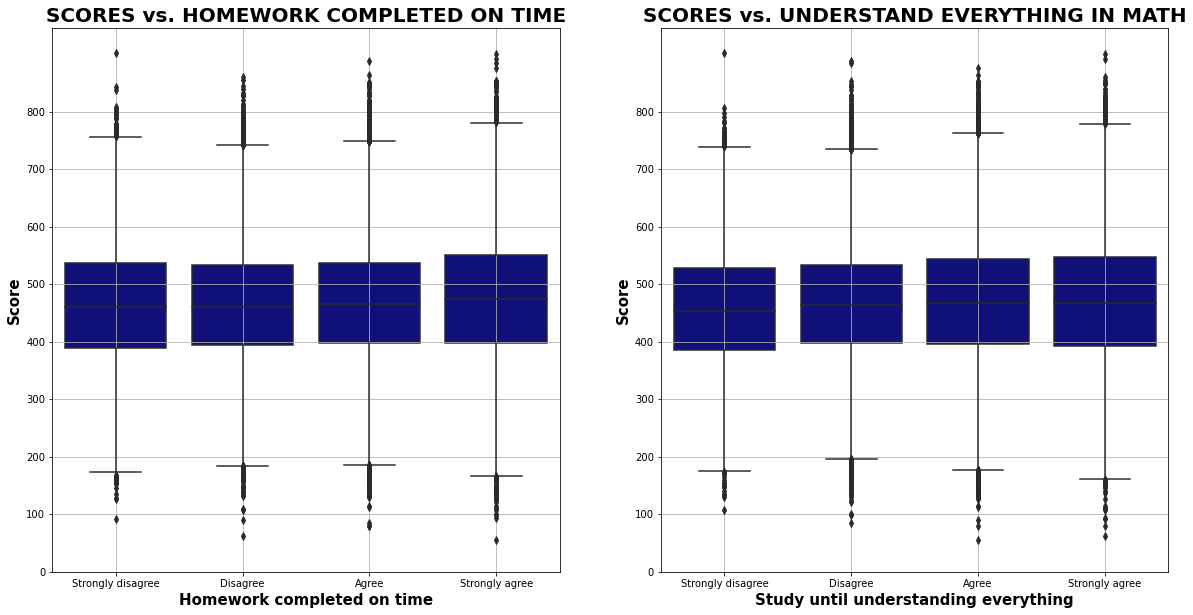

In [123]:

# Let's plot the score of students according to their work ethics in math:
fig, ax = plt.subplots(ncols=2, figsize = [30,10])

order=['Strongly disagree','Disagree','Agree','Strongly agree']

sb.boxplot(data=pisa_df, x='Homework_completed_in_time', y='Avg_math_results', color='darkblue', order=order, ax = ax[0]).axes.set_title("SCORES vs. HOMEWORK COMPLETED ON TIME",fontsize=20, weight='bold')
sb.boxplot(data=pisa_df, x='Study_until_understand_everything', y='Avg_math_results', color='darkblue', order=order, ax = ax[1]).axes.set_title("SCORES vs. UNDERSTAND EVERYTHING IN MATH",fontsize=20, weight='bold')

ax[0].grid()
ax[0].set_yticks(score_ticks)
ax[0].set_xlabel("Homework completed on time", fontsize=15, weight='bold')
ax[0].set_ylabel("Score",fontsize=15, weight='bold' )
ax[1].grid()
ax[1].set_yticks(score_ticks)
ax[1].set_xlabel("Study until understanding everything", fontsize=15, weight='bold')
ax[1].set_ylabel("Score",fontsize=15, weight='bold' )


plt.show()

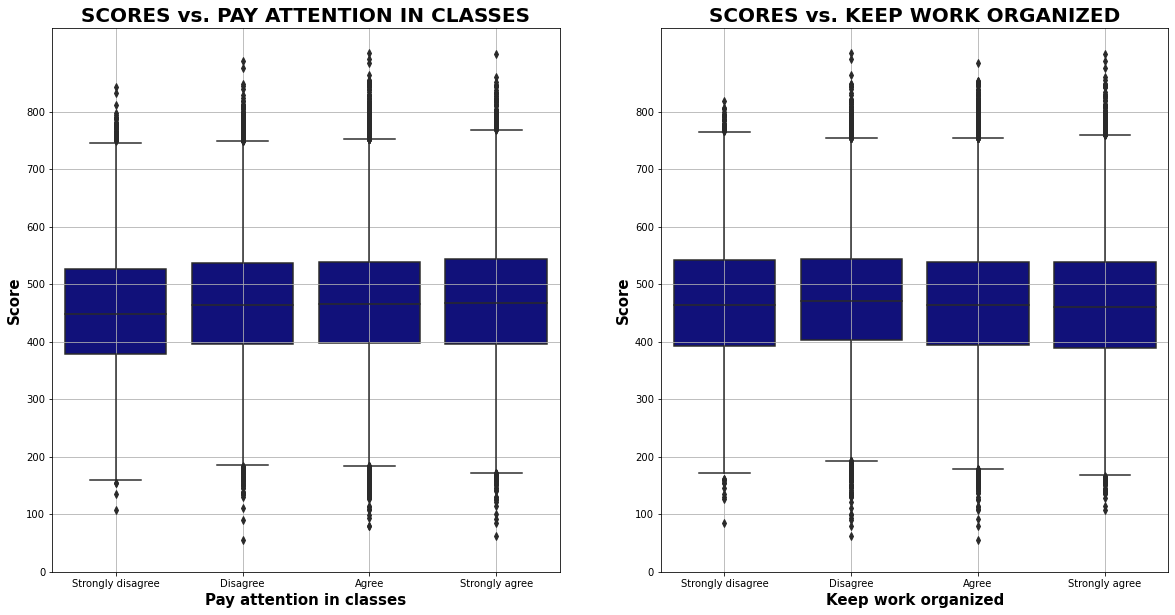

In [120]:

# Let's plot the score of students according to their work ethics in math:
fig, ax = plt.subplots(ncols=2, figsize = [30,10])

order=['Strongly disagree','Disagree','Agree','Strongly agree']

sb.boxplot(data=pisa_df, x='Pay_attention_in_classes', y='Avg_math_results', color='darkblue', order=order, ax = ax[0]).axes.set_title("SCORES vs. PAY ATTENTION IN CLASSES",fontsize=20, weight='bold');
sb.boxplot(data=pisa_df, x='Keep_work_organized', y='Avg_math_results', color='darkblue', order=order, ax = ax[1]).axes.set_title("SCORES vs. KEEP WORK ORGANIZED",fontsize=20, weight='bold');


ax[0].grid()
ax[0].set_yticks(score_ticks)
ax[0].set_xlabel("Pay attention in classes", fontsize=15, weight='bold')
ax[0].set_ylabel("Score",fontsize=15, weight='bold' )
ax[1].grid()
ax[1].set_yticks(score_ticks)
ax[1].set_xlabel("Keep work organized", fontsize=15, weight='bold')
ax[1].set_ylabel("Score",fontsize=15, weight='bold' )

plt.show()

## PARENTS INTERESTED IN MATH VS STUDENTS' SCORES:
While not necessarly parents like math, but only the fact that they think math is important shows a positive impact on the scores of their children. The median and the 3rd quartiles of students' scores are significantly higher when their parent perceive math as important.

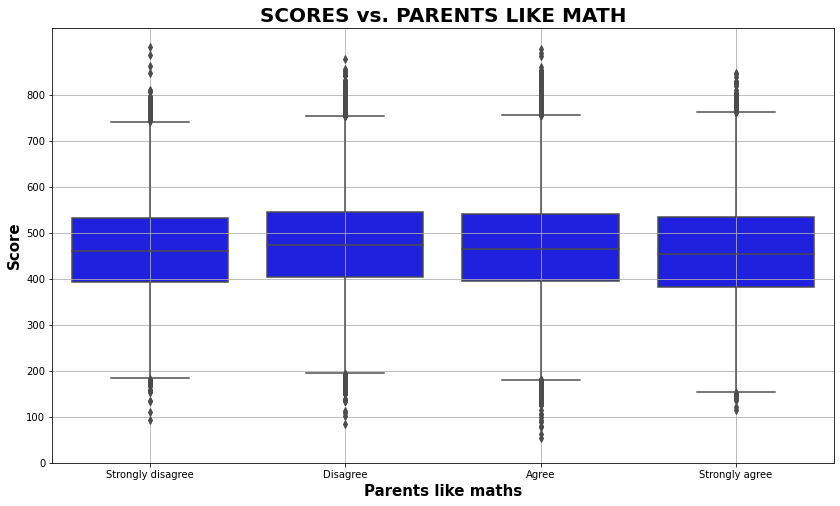

In [131]:
# Let's plot the score of students according to their parents' interest in math:
fig, ax = plt.subplots(figsize = [14,8])

order=['Strongly disagree','Disagree','Agree','Strongly agree']

sb.boxplot(data=pisa_df, x='Parents_like_math', y='Avg_math_results', color='blue', order=order, ax = ax).axes.set_title("SCORES vs. PARENTS LIKE MATH",fontsize=20, weight='bold')

ax.grid()
ax.set_yticks(score_ticks)
ax.set_xlabel("Parents like maths", fontsize=15, weight='bold')
ax.set_ylabel("Score",fontsize=15, weight='bold' )

plt.show()

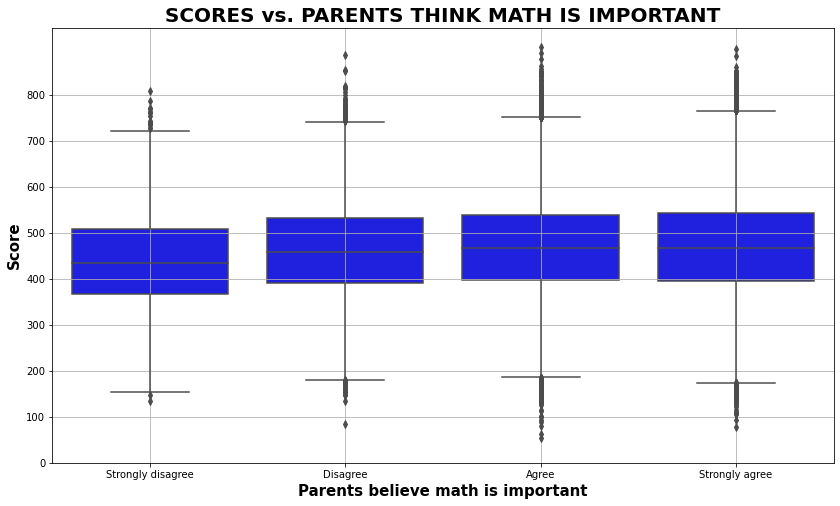

In [132]:
# Let's plot the score of students according to their parents' interest in math:
fig, ax = plt.subplots(figsize = [14,8])

order=['Strongly disagree','Disagree','Agree','Strongly agree']

sb.boxplot(data=pisa_df, x='Parents_believe_math_important', y='Avg_math_results', color='blue', order=order, ax = ax).axes.set_title("SCORES vs. PARENTS THINK MATH IS IMPORTANT",fontsize=20, weight='bold');


ax.grid()
ax.set_yticks(score_ticks)
ax.set_xlabel("Parents believe math is important", fontsize=15, weight='bold')
ax.set_ylabel("Score",fontsize=15, weight='bold' )

plt.show()

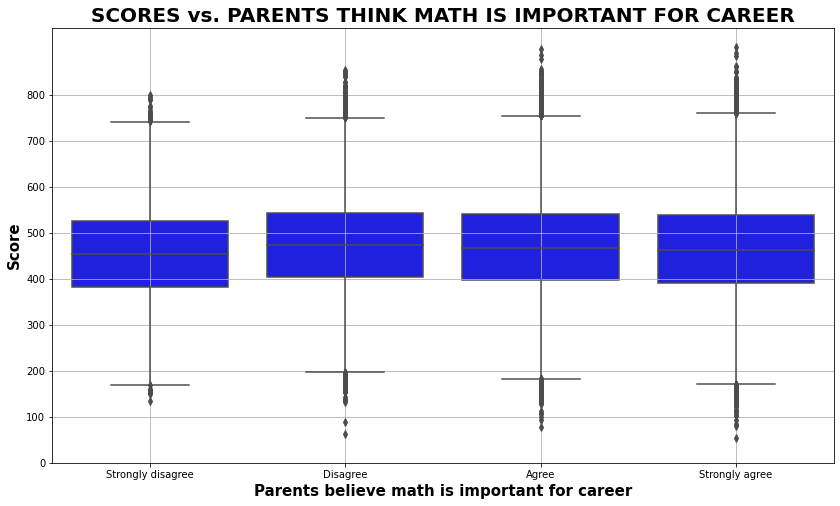

In [133]:
# Let's plot the score of students according to their parents' interest in math:
fig, ax = plt.subplots(figsize = [14,8])

order=['Strongly disagree','Disagree','Agree','Strongly agree']

sb.boxplot(data=pisa_df, x='Parents_believe_math_important_for_career', y='Avg_math_results', color='blue', order=order, ax = ax).axes.set_title("SCORES vs. PARENTS THINK MATH IS IMPORTANT FOR CAREER",fontsize=20, weight='bold');

ax.grid()
ax.set_yticks(score_ticks)
ax.set_xlabel("Parents believe math is important for career", fontsize=15, weight='bold')
ax.set_ylabel("Score",fontsize=15, weight='bold' )
plt.show()

## MATH LEARNING STRATEGIES VS SCORES:

In total, we have analyzed 12 learning strategies and we have noticed that there isn't a certain strategy that was clearly differentiated from the others. Students with high and low scores used the same strategies. With that said, here are the 3 best and 2 worst learning strategies in terms of the score median:

- The 3 best learning strategies:
    + Relating to known
    + Improve understanding
    + Seeking more information

- The 2 worst learning strategies:
    + Learn by heart
    + Find new ways



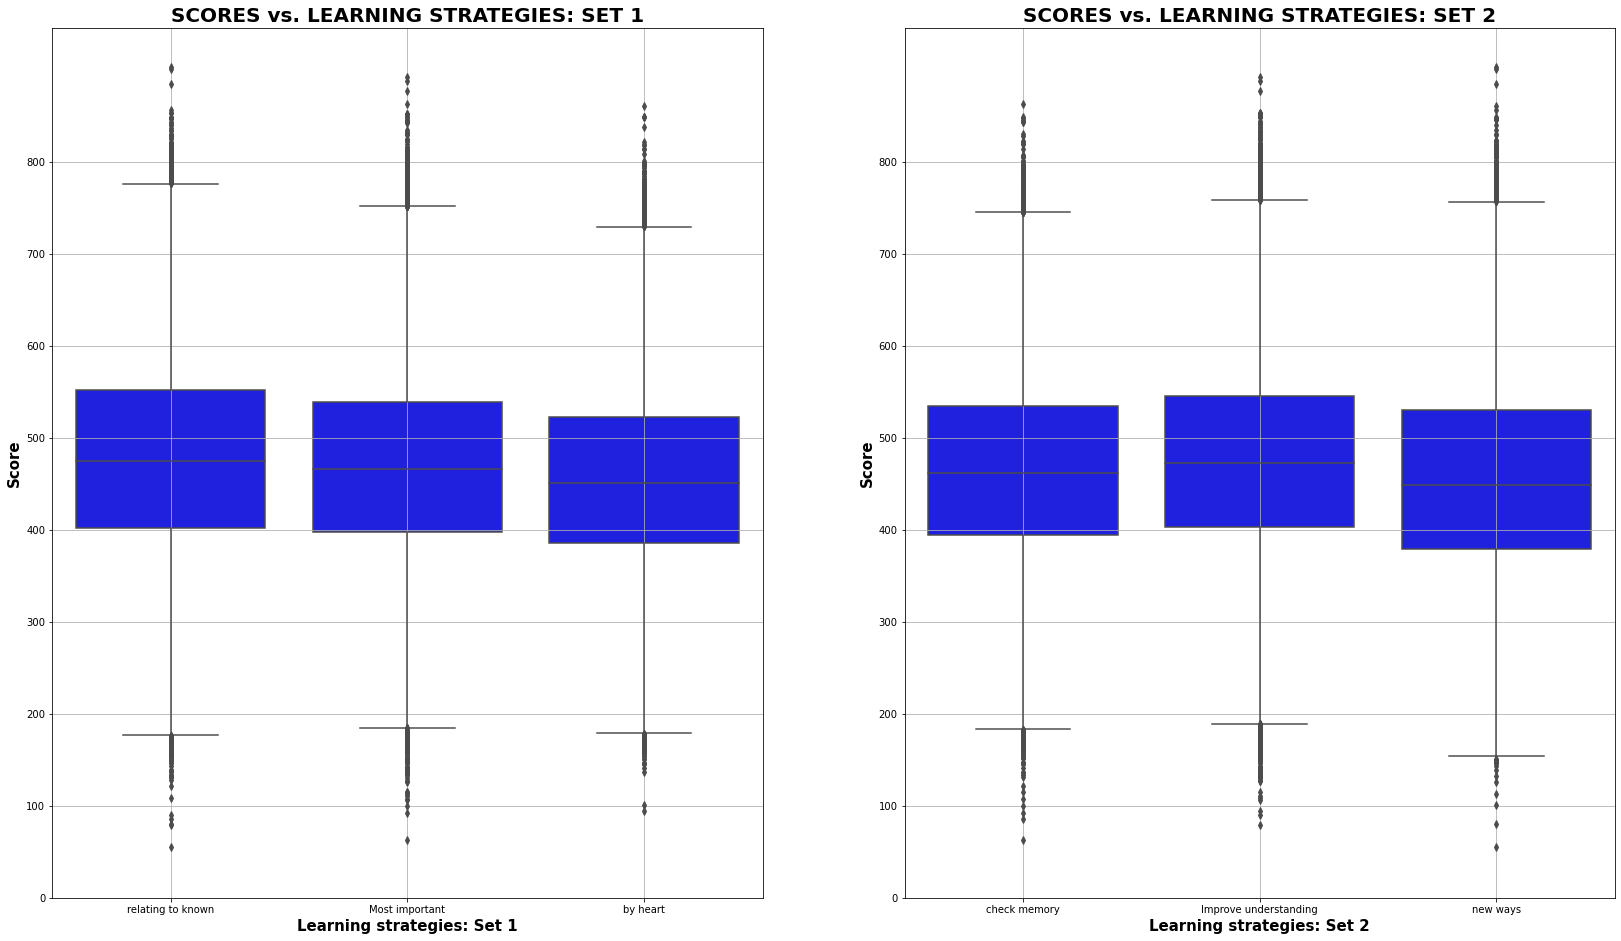

In [137]:
# Let's plot the score of students according to their math learning strategies:
fig, ax = plt.subplots(ncols=2, figsize = [28,16])


sb.boxplot(data=pisa_df, x='Q01_Learning_strategies', y='Avg_math_results', color='blue', ax = ax[0]).axes.set_title("SCORES vs. LEARNING STRATEGIES: SET 1",fontsize=20, weight='bold')
sb.boxplot(data=pisa_df, x='Q02_Learning_strategies', y='Avg_math_results', color='blue', ax = ax[1]).axes.set_title("SCORES vs. LEARNING STRATEGIES: SET 2",fontsize=20, weight='bold');


ax[0].grid()
ax[0].set_yticks(score_ticks)
ax[0].set_xlabel("Learning strategies: Set 1", fontsize=15, weight='bold')
ax[0].set_ylabel("Score",fontsize=15, weight='bold' )
ax[1].grid()
ax[1].set_yticks(score_ticks)
ax[1].set_xlabel("Learning strategies: Set 2", fontsize=15, weight='bold')
ax[1].set_ylabel("Score",fontsize=15, weight='bold' )

plt.show()

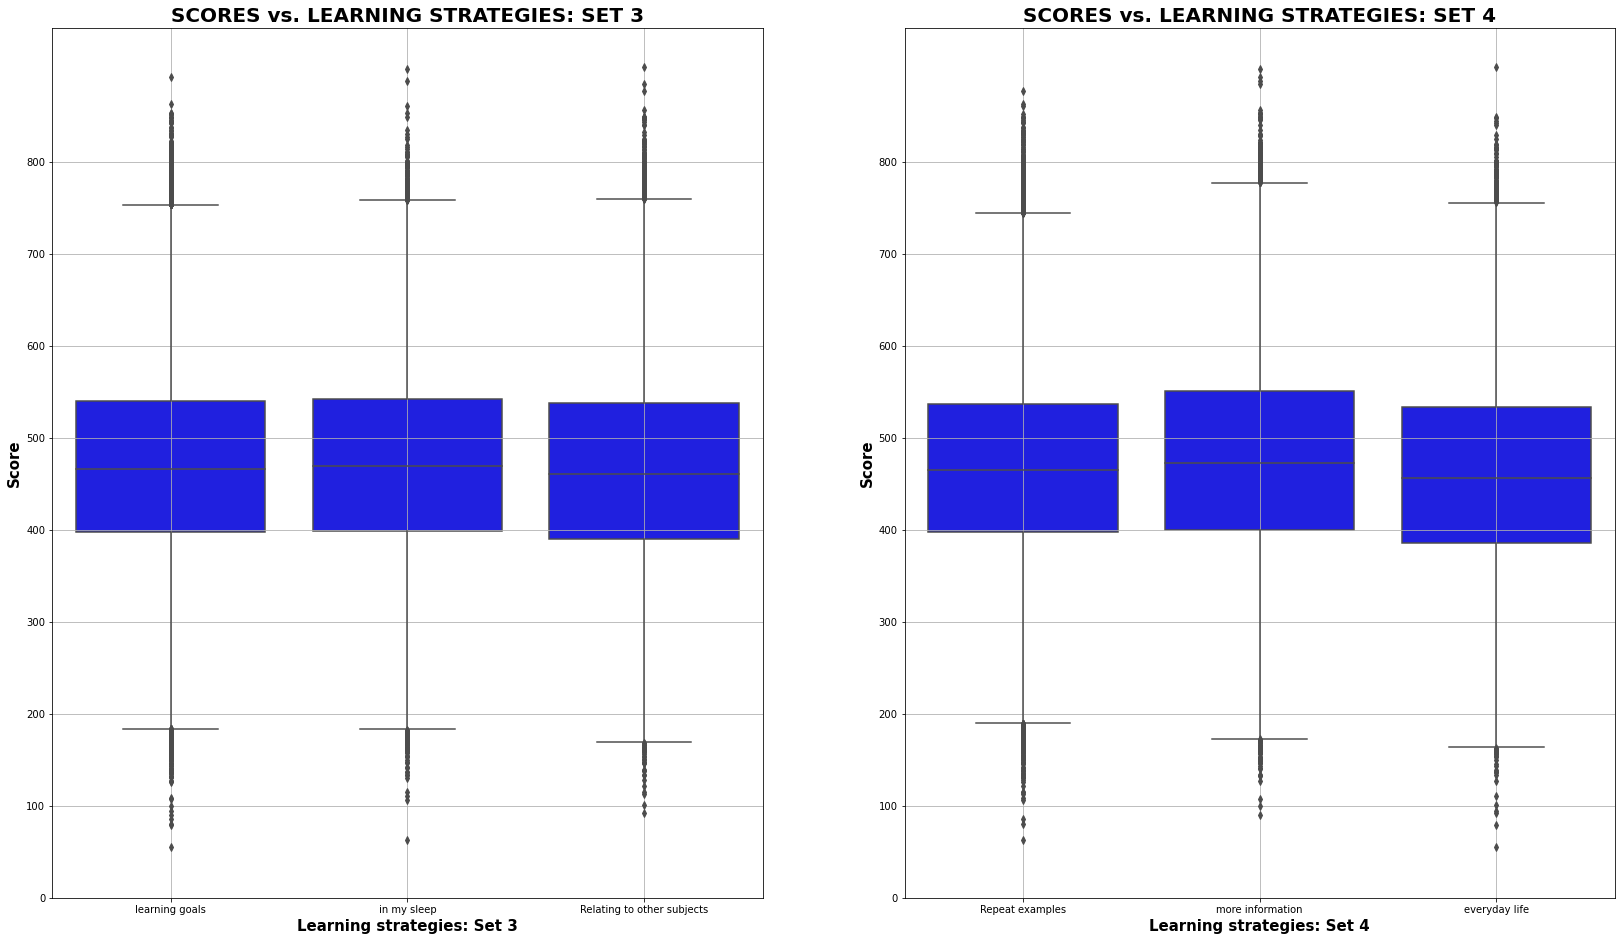

In [135]:
# Let's plot the score of students according to their math learning strategies:
fig, ax = plt.subplots(ncols=2, figsize = [28,16])


sb.boxplot(data=pisa_df, x='Q03_Learning_strategies', y='Avg_math_results', color='blue', ax = ax[0]).axes.set_title("SCORES vs. LEARNING STRATEGIES: SET 3",fontsize=20, weight='bold');
sb.boxplot(data=pisa_df, x='Q04_Learning_strategies', y='Avg_math_results', color='blue', ax = ax[1]).axes.set_title("SCORES vs. LEARNING STRATEGIES: SET 4",fontsize=20, weight='bold')



ax[0].grid()
ax[0].set_yticks(score_ticks)
ax[0].set_xlabel("Learning strategies: Set 3", fontsize=15, weight='bold')
ax[0].set_ylabel("Score",fontsize=15, weight='bold' )
ax[1].grid()
ax[1].set_yticks(score_ticks)
ax[1].set_xlabel("Learning strategies: Set 4", fontsize=15, weight='bold')
ax[1].set_ylabel("Score",fontsize=15, weight='bold' )
plt.show()

In [ ]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt